In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
import warnings

# Extract Data from Files

In [9]:
leads = pd.read_csv("data/leads.csv")
closed_leads = pd.read_csv("data/closed.csv")

# Visualise Data 

In [10]:
leads.head()

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search


In [11]:
leads.shape

(8000, 4)

In [30]:
closed_leads.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0


In [31]:
closed_leads['converted_lead'] = 1

In [32]:
closed_leads.shape

(842, 15)

In [40]:
data_1 = pd.merge(leads, closed_leads, how = "left", on = "mql_id")

In [41]:
data_1.shape

(8000, 18)

In [42]:
data_1.head()

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,converted_lead
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,1.0


In [47]:
data_1['lost'] = data_1['won_date'].isnull() #if won date is null, the lead was not closed 

Text(0.5, 1.0, 'Lead Conversion Count Over time')

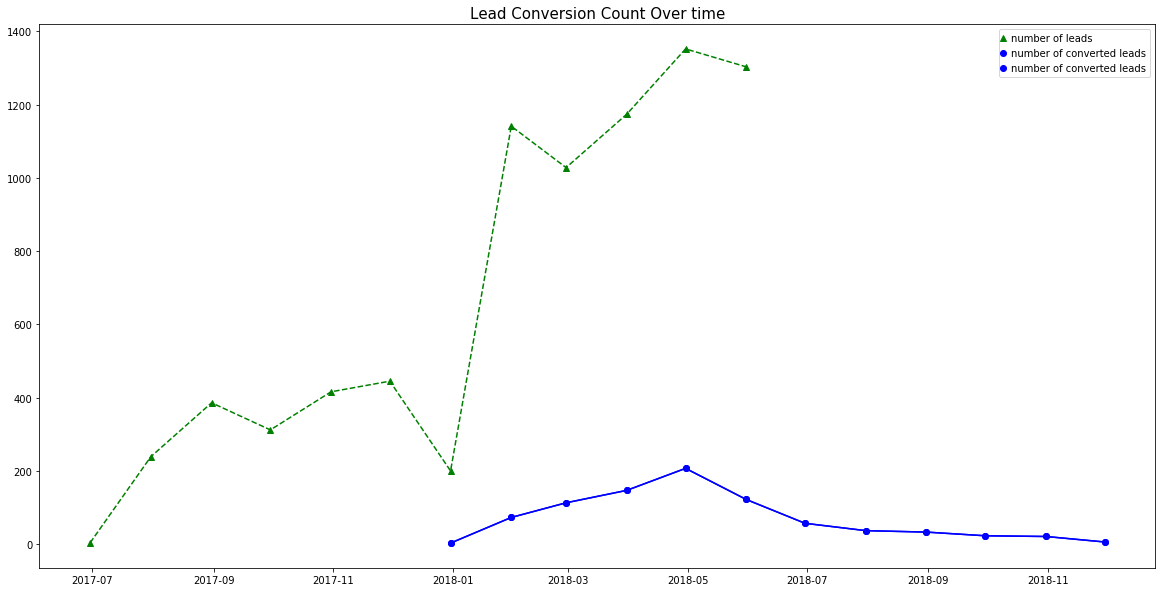

In [75]:

num_mql = leads.set_index(pd.to_datetime(leads['first_contact_date']))
num_mql = num_mql.groupby(pd.Grouper(freq = "M")).count().drop(axis =1, columns = ['first_contact_date',"landing_page_id", "origin"])
num_won = closed_leads.set_index(pd.to_datetime(closed_leads["won_date"]))
num_won = num_won.groupby(pd.Grouper(freq = "M")).count().drop(axis = 1, columns = ["seller_id", "sdr_id", "sr_id","business_segment", "lead_type", "lead_behaviour_profile", "has_company", "has_gtin", "average_stock", "business_type","declared_product_catalog_size",
 "declared_monthly_revenue", "won_date"])
plt.figure(figsize = (20,10))
plt.plot(num_mql.index, num_mql, "g--^", label = 'number of leads' )
plt.plot(num_won.index, num_won, "b-o", label = 'number of converted leads')
plt.legend(loc='best', numpoints=1, handlelength=0)
plt.title("Lead Conversion Count Over time", size = 15)

Text(0.5, 1.0, 'Number of Leads by Origin')

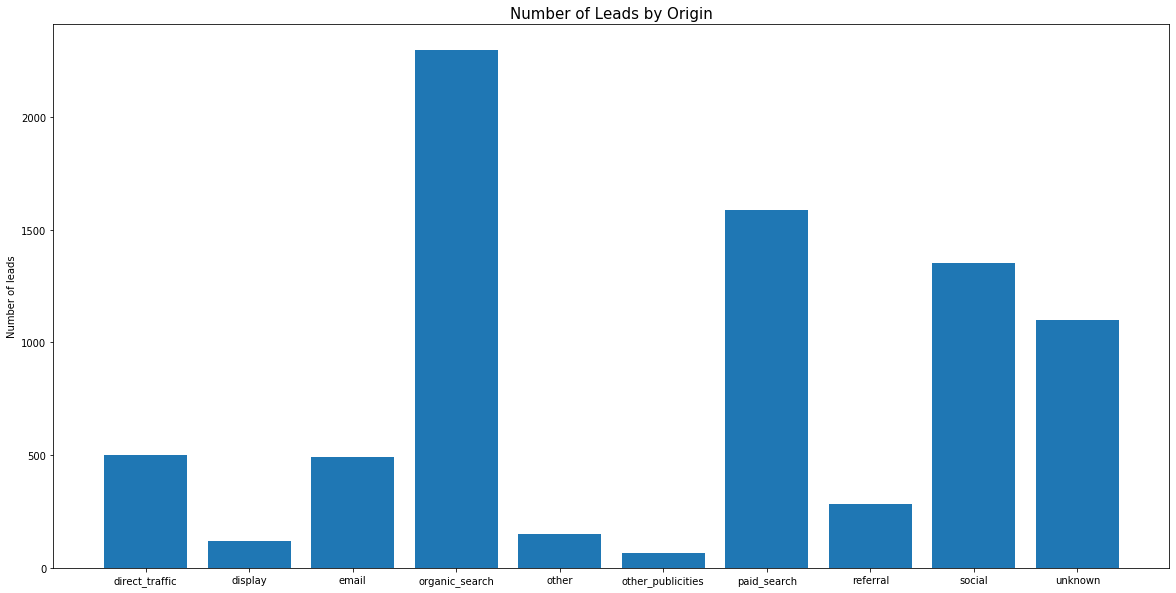

In [80]:
mql_origin = leads.groupby('origin').agg({'mql_id':"count"})
origin = list(mql_origin.index)

#Number of MQL by channels
plt.figure(figsize = (20,10))
plt.bar(mql_origin.index, mql_origin['mql_id'])
plt.xticks(rotation = 0)
plt.ylabel('Number of leads')
plt.title("Number of Leads by Origin", size =15)

Text(0.5, 1.0, 'Lead Conversion % by Origin')

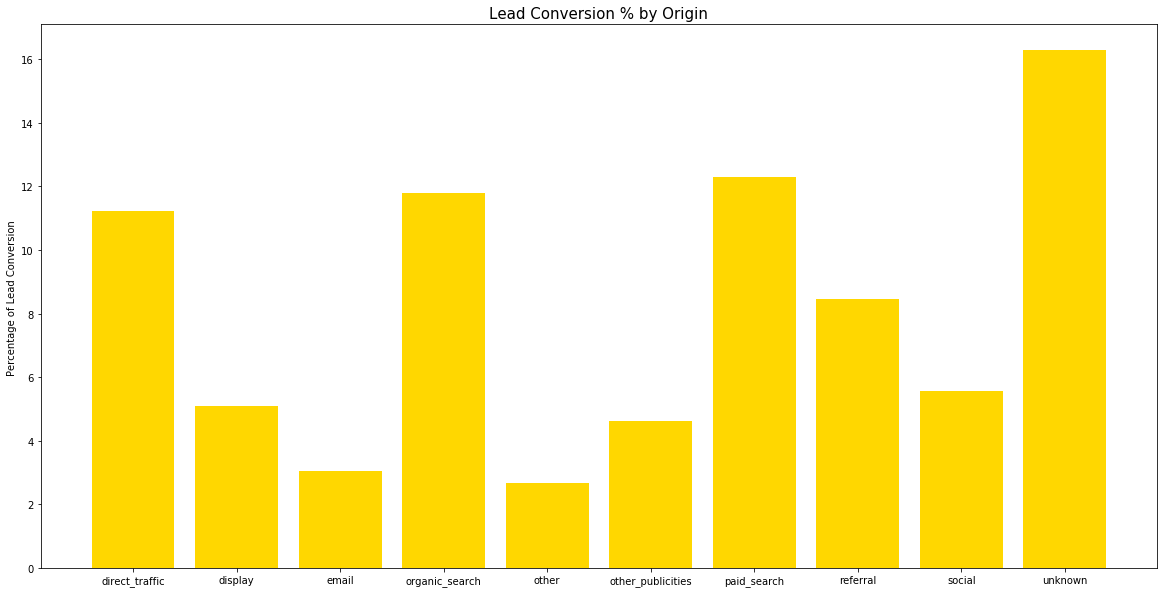

In [103]:
data_origin = data_1[["origin","lost", 'mql_id']]
origin_lost = data_origin.groupby(['origin', 'lost']).count()

percentage = []
for i in origin:
    pct = (origin_lost.loc[i].loc[False][0]/(origin_lost.loc[i].loc[True][0]+origin_lost.loc[i].loc[False][0]))*100
    percentage.append(pct)

plt.figure(figsize = (20,10))
plt.bar(origin, percentage, color="gold")
plt.xticks(rotation = 0)
plt.ylabel('Percentage of Lead Conversion ')
plt.title("Lead Conversion % by Origin", size = 15)

In [89]:
mql_lp = leads.groupby('landing_page_id').agg({'mql_id':"count"})
mql_lp = mql_lp[mql_lp['mql_id'] > 30]
data_lp = pd.merge(data_1, mql_lp, how = "inner", left_on = "landing_page_id", right_index = True)
#ata_lp = data_lp[data_lp['lost']] 
lp_lost = data_lp.groupby(['landing_page_id', 'lost']).agg({'mql_id_x':"count"})
landing_page = list(mql_lp.index)

percentage_lp = []
landing_page_2 = []
Num_mql = []
for i in landing_page:
    if mql_lp.loc[i][0] == lp_lost.loc[i].loc[True][0]:
        lp_lost.drop([i])
    else:
        pct = (lp_lost.loc[i].loc[False][0]/(lp_lost.loc[i].loc[True][0]+lp_lost.loc[i].loc[False][0]))*100
        percentage_lp.append(pct)
        landing_page_2.append(i)
        Num_mql.append(mql_lp.loc[i][0])


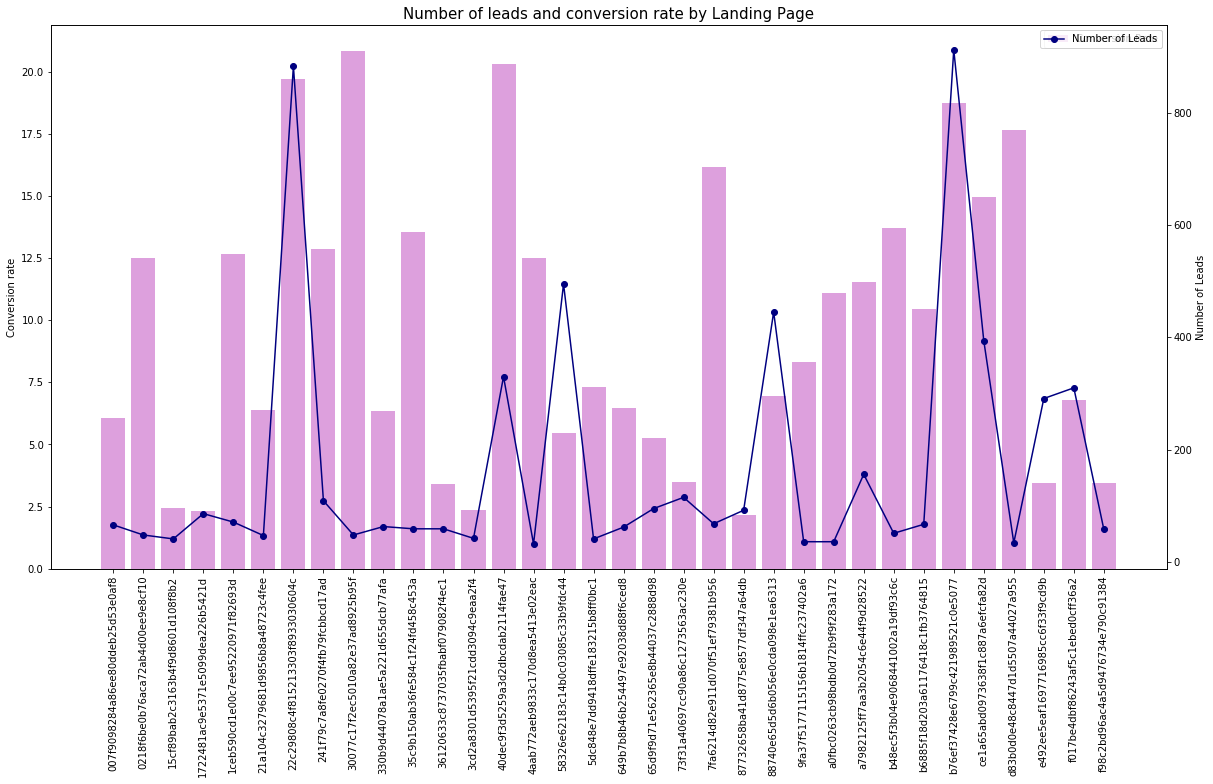

In [101]:
# Landing Page number of MQL and Won rate
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
ax.bar(landing_page_2, percentage_lp, label = "Conversion Rate", color="plum")
ax2.plot(landing_page_2, Num_mql, "b-o" , color = "navy", label = "Number of Leads")
ax.set_ylabel('Conversion rate')
ax.legend()
ax2.set_ylabel('Number of Leads')
ax2.legend()
plt.title("Number of leads and conversion rate by Landing Page", size = 15)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)


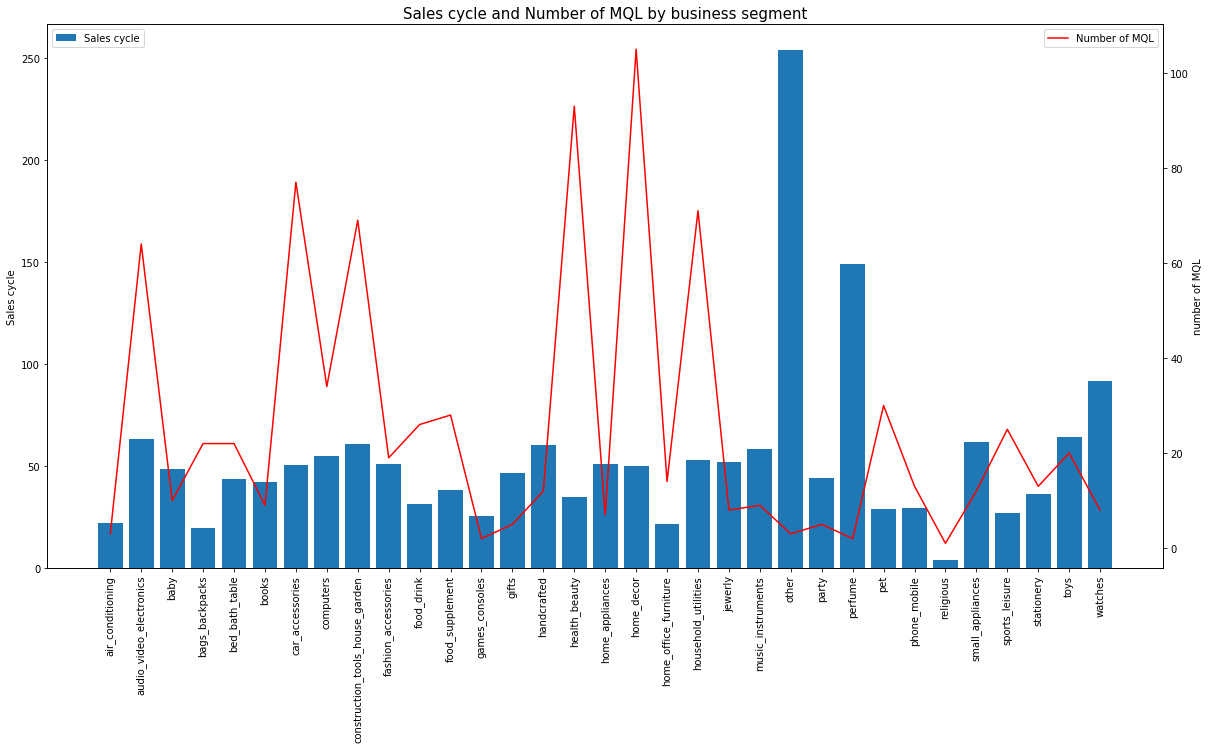

In [107]:
data2 = pd.merge(leads, closed_leads, how = "right", on = "mql_id")

#Turn string into datetime data
data2['first_contact_date'] = pd.to_datetime(data2['first_contact_date'])
data2['won_date'] = pd.to_datetime(data2['won_date'])

#Sales cycle calculation
data2['sales cycle'] = data2['won_date'] - data2['first_contact_date']
data2['sales cycle'] = data2['sales cycle'].dt.days

segment_time = data2.groupby(['business_segment']).agg({"mql_id":"count", "sales cycle":"mean"})

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
ax.bar(segment_time.index, segment_time['sales cycle'], label = "Sales cycle")
ax2.plot(segment_time.index, segment_time['mql_id'], color = "red", label = "Number of MQL")
ax.set_ylabel('Sales cycle')
ax.legend(loc = "upper left")
plt.title("Sales cycle and Number of MQL by business segment", size =15)
ax2.legend(loc = "upper right")
ax2.set_ylabel('number of MQL')
for tick in ax.get_xticklabels():
    tick.set_rotation(90)